## 1. Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## 2.Read Data as a DataFrame

In [3]:
dataset = pd.read_csv('./car data.csv')

o## 3. Analysis dataset

### 3.1 Overview dataset

In [7]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3.2 Checking rows and columns

In [8]:
dataset.shape

(301, 9)

### 3.3 get some datatype of each column

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## 4. Encoding data

Encoding string type to category type. Using its index
Example ['BMW', "Honda"] -> [0, 1]

In [10]:
def encoding(df_col):
    if df_col.dtype in ['int32', 'int64', 'float64']:
        return df_col
    
    unique_vale = pd.unique(df_col)
    dictionary = dict()

    for index, key in enumerate(unique_vale):
        dictionary[key] = index
    
    
    return df_col.replace(dictionary)

In [11]:
dataset = dataset.apply(encoding)
# dataset

In [13]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0,2014,3.35,5.59,27000,0,0,0,0
1,1,2013,4.75,9.54,43000,1,0,0,0
2,2,2017,7.25,9.85,6900,0,0,0,0
3,3,2011,2.85,4.15,5200,0,0,0,0
4,4,2014,4.60,6.87,42450,1,0,0,0


## 5 Splitting Dataset

### 5.1 Splitting to input data and target data

In [14]:
X = dataset.drop("Selling_Price", axis=1)
y = dataset['Selling_Price']

### 5.1 Splitting to train and test for input and target dataset

In [15]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

## 6 Define plot accuracy func

In [16]:
def plot_accuracy(y_predict, y_test):
    x = [x for x in range(y_test.shape[0])]
    plt.scatter(x, y_test, color="red")
    plt.scatter(x, y_predict, color="blue")

## 7 Model Training
### 7.1 Linear Regression

In [17]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [18]:
y_predict = linear_reg.predict(x_test)

In [19]:
metrics.r2_score(y_predict, y_test)

0.75512357102326

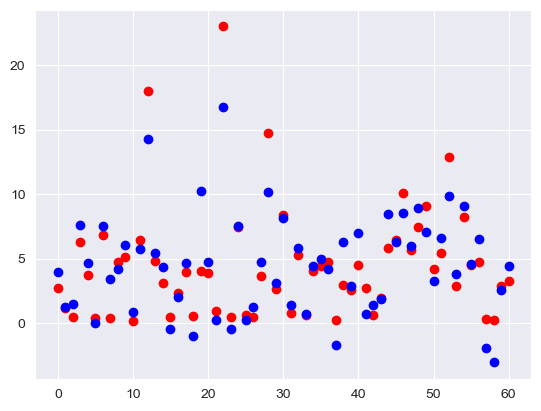

In [20]:
plot_accuracy(y_predict,y_test)

### 7.2 Lasso Regression

In [21]:
lasso_reg = Lasso(alpha=6.58)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=6.58)

In [22]:
y_predict = lasso_reg.predict(x_test)
metrics.r2_score(y_predict, y_test)

0.0098163593131948

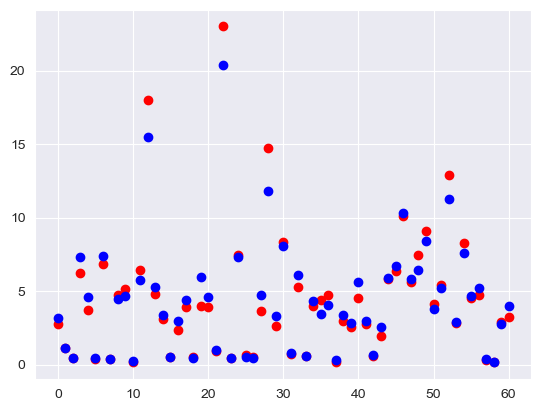

In [30]:
plot_accuracy(y_predict, y_test)

### 7.3 Random Forest 

In [32]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(x_test)

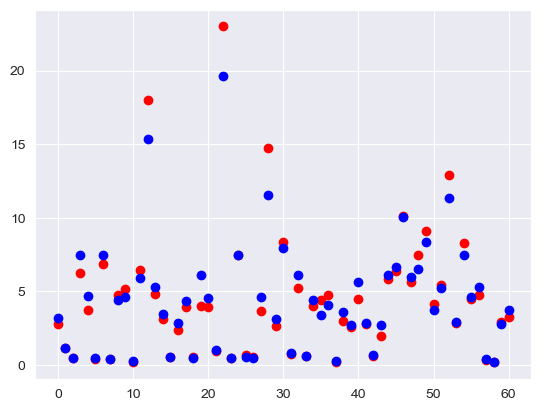

In [33]:
plot_accuracy(y_predict,y_test)

**Ramdom forest algorithm has a accuracy is highest**

## 8. Save model

In [28]:
import joblib

In [29]:
joblib.dump(random_forest, "./Models/random_forest.pkl")
joblib.dump(linear_reg, "./Models/linear_reg.pkl")
joblib.dump(lasso_reg, "./Models/lasso_reg.pkl")

['./Models/lasso_reg.pkl']